<a href="https://colab.research.google.com/github/Rocky12312/CustomerAnalytics/blob/master/Customer_segamentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My\ Drive/Customer_analytics

/content/drive/My Drive/Customer_analytics


In [3]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Reading the customer data
df_cus = pd.read_csv("cus.csv",index_col = 0)

In [5]:
df_cus.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


By setting the index_col = 0 we have actually set our ID column to be the index of dataframe

Basically the description of 

In [6]:
print(len(df_cus))

2000


From the customer data we can see that we have 7 columns and 2000 rows in our dataset which contain information about our customer including their age,occupation etc and what we have to do is group our customers in segments.

Getting the info of the data

In [7]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


Getting the statistical description of different columns in the data

In [8]:
df_cus.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


From the statistical description we can see many things of our customer like the mean age, mean income, count etc which we are not able to see directly from the csv

One of the good thing is always to check for the null in data and if they are present they should be handled using upsampling, downsampling, SMOTE etc.

In [9]:
df_cus.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

So as we can see that we don't have NaN values in our data so now better will be to proceed forward with other data analysis.

Now one of the other good thing is to check correlation between our features as it give us a good estimate of feature dependencies.

Correlation describes the linear dependency between variables(ranges from -1 to 1) with -1 indicating very strong negative correlation(if one increases other decreases) and 1 very strong positive correlation(if onr increases other increase too) and middle values vary accordingly.

In [10]:
df_cus.corr(method = "pearson")

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


From the correlation statistics it is clear that features like age and education, education and income have strong correlation.

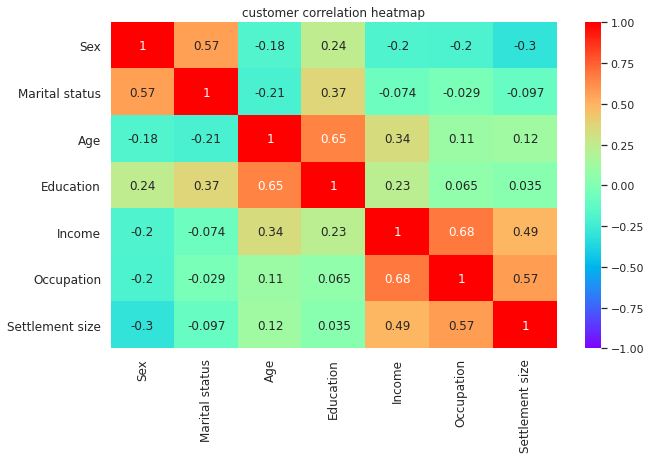

In [11]:
sns.set()
plt.figure(figsize = (10,6))
ht_cus = sns.heatmap(df_cus.corr(),annot = True,cmap = "rainbow",vmin = -1,vmax = 1)
ht_cus.set_yticklabels(ht_cus.get_yticklabels(),rotation = 0,fontsize = 12)
ht_cus.set_xticklabels(ht_cus.get_xticklabels(),rotation = 90,fontsize = 12)
plt.title("customer correlation heatmap")
plt.show()

Exploring the correlation between the features of customers is the first step to identify similar customers and putting them in groups

Plotting the scatter plot between age and income similarly we can plot our data and see the distribution of our data

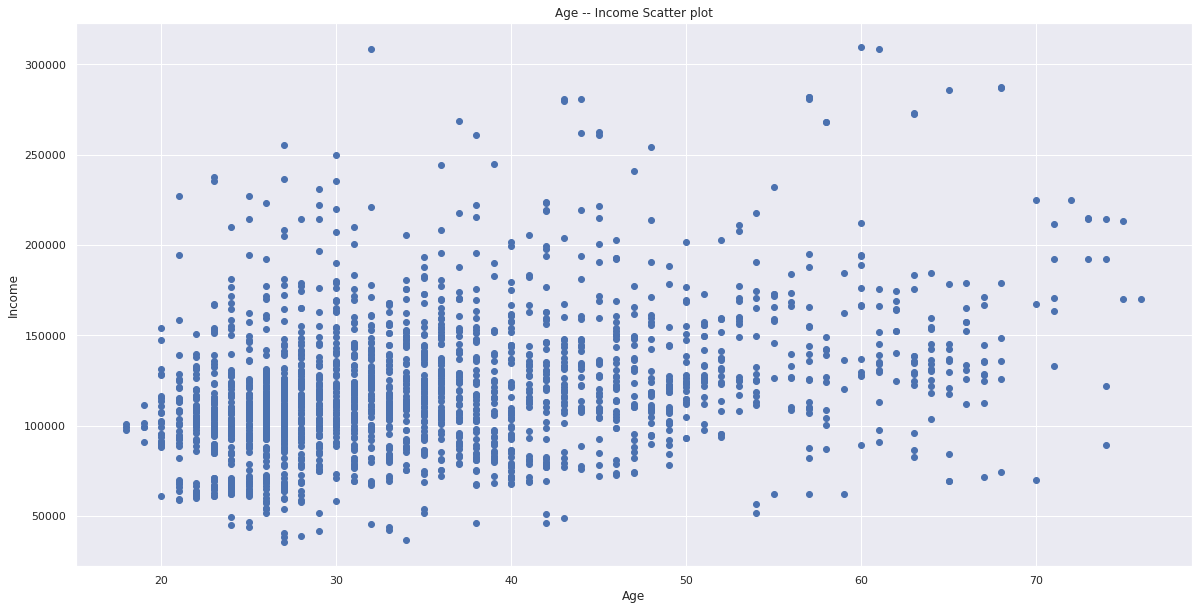

In [12]:
plt.figure(figsize = (20,10))
plt.scatter(df_cus.iloc[:,2],df_cus.iloc[:,4])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age -- Income Scatter plot")
plt.show()

The plot show how the income is scattered across different age groups.

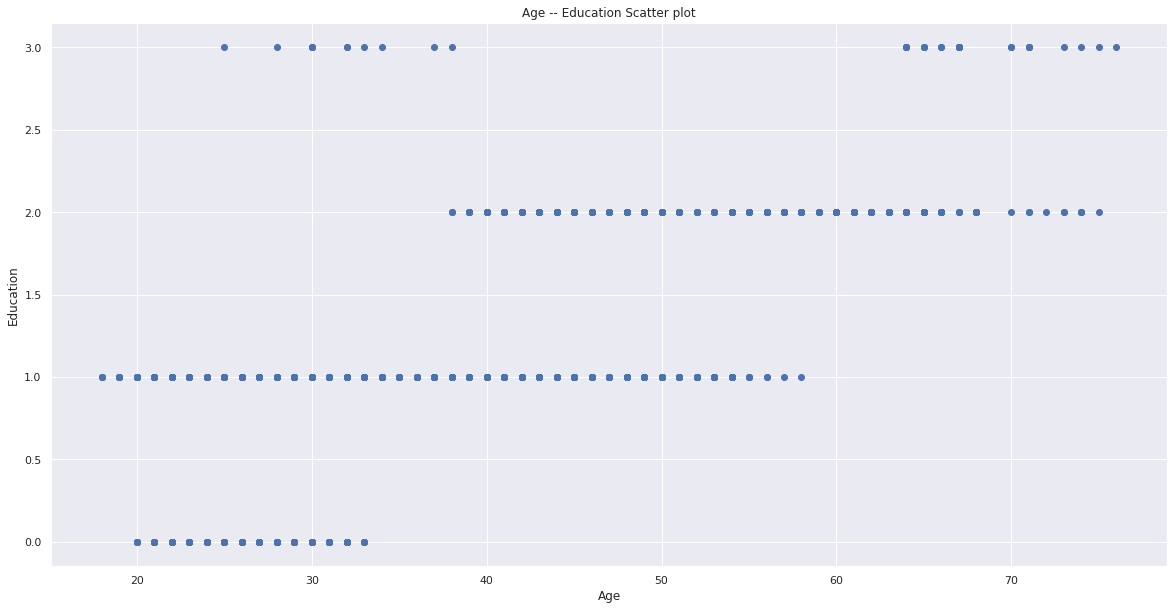

In [13]:
plt.figure(figsize = (20,10))
plt.scatter(df_cus.iloc[:,2],df_cus.iloc[:,3])
plt.xlabel("Age")
plt.ylabel("Education")
plt.title("Age -- Education Scatter plot")
plt.show()

Visualizing the education against the age and we can see that most educated persons belong to middle age group.

We can also visualize a feature using all other features by just using distplot.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


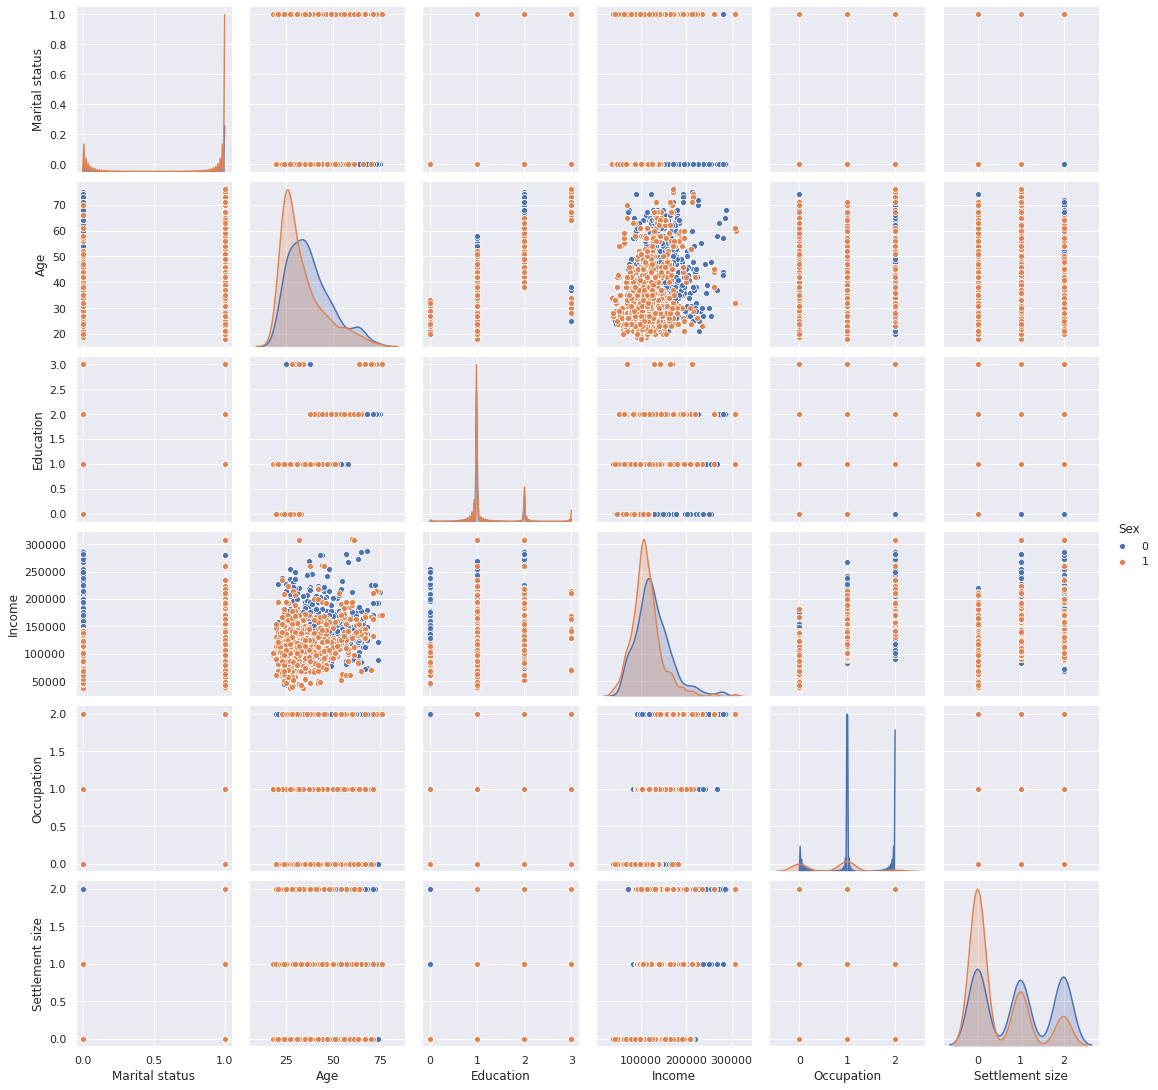

In [14]:
sns.pairplot(df_cus,hue = "Sex",size=2.5)

Similarly we can also explore other features

Statistically preprocessing our data(standardizing our data so that all our features lie in same range such that difference between there value will be comparable)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_df_cus = sc.fit_transform(df_cus)

In [16]:
standardized_df_cus
#This is now our standardized data

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

Performing Hierarchical Clustering on the standardized data.

Basically a dendogram is tree like hierarchical representation of points and linkage is clustering method we employ.

In [0]:
from scipy.cluster.hierarchy import dendrogram,linkage
hier_clu_df = linkage(standardized_df_cus,method = "ward")
#The above function perform hierarchical clustering on our data and returns clustering result as so called linkage matrix

Now visualizing the hierarchy

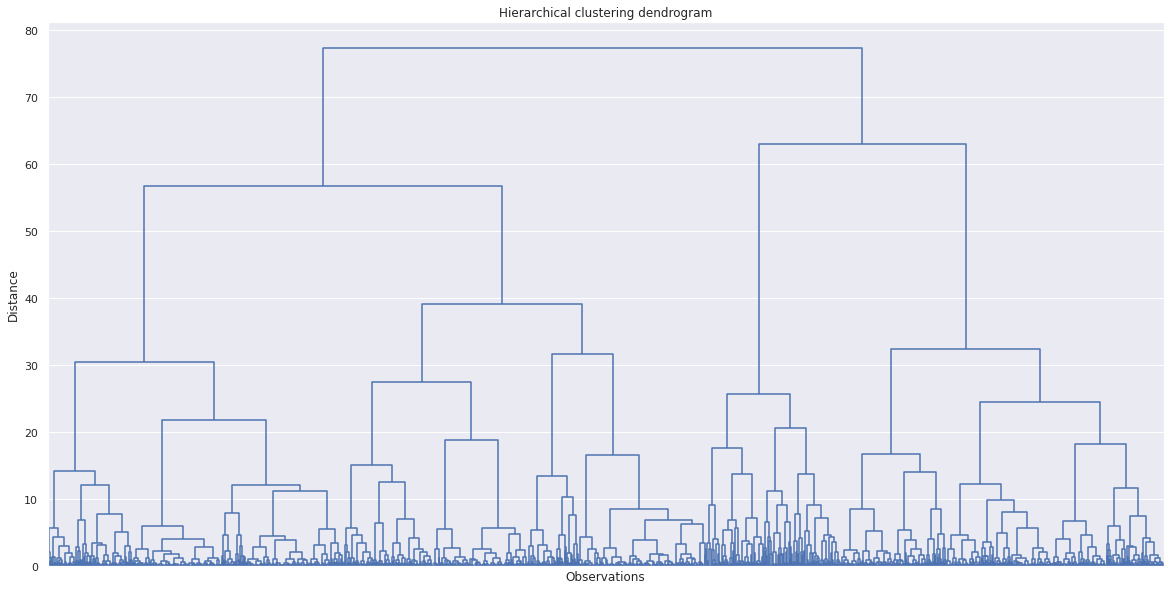

In [18]:
plt.figure(figsize = (20,10))
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clu_df,show_leaf_counts = False,no_labels = True,color_threshold = 0)
plt.show()

As we have labelled our x axis of plot to be observations so the x axis correspnds to our data records or data points(all data points) and what our clustering algorithm will do is group them together base on the distance.

Horizontal line in the plot represent the join between two clusters and the vertical line actually infers in a way that smaller the distance between points they will be grouped together down in the tree and also shows that they are more similar to each other and vice versa if distance is large.

Also the linkage method return clustering result in linkage matrix.

For better visualization as the dendrogram looks bit messier we can also set truncate_mode and see only a few levels in dendrogram  and also remove color_threshold parameter to see the clusters.

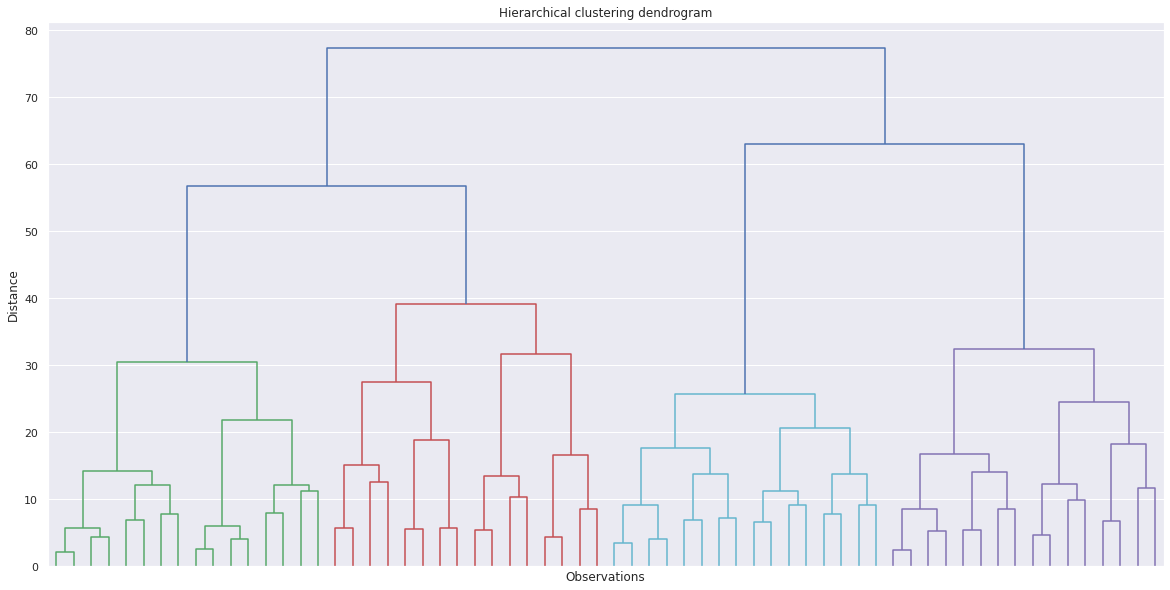

In [19]:
plt.figure(figsize = (20,10))
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clu_df,show_leaf_counts = False,truncate_mode = "level",p = 5,no_labels = True)
plt.show()

Now as we can see that now the dendrogram looks preety good and we can see 4 clusters in our dendrogram with four different colours.

Now we will be finding the clusters and for which we usually follow a thumb rule to find the longest vertical line which is not intercepted by any horizontal line and using that line we get the number of clusters which are  equal to the number of cuts that any horizontal line passing through this line make on other vertical lines.

Basically our hierarchical clustering method is slow as compared to flat clustering.

But it can be really helpful in finding the number of clusters and then using flat clustering for segamentation.

Basically when using K-means clustering we have to mention the number of clusters as a parameter in advance(which either we can choose randomly or looking at the data how many clusters we expect based on someprior experience)

Basically as we know that K-means clustering is very simple but it's simplicity also raises some of the issues one is that outliers become their own clusters.
As a soln we can perform K-median clustering but is comparitively computationaly expensive.

We will use WCSS to determine the best clustering soluution.

In [0]:
from sklearn.cluster import KMeans

We will be using K-menas++ which determine the best starting seeds before running K-means

We will be running the Kmeans for different values of cluster and will plot it to see what should be the number of clusters which we should take to segament our data.

In [0]:
WCSS = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
  kmeans.fit(standardized_df_cus)
  WCSS.append(kmeans.inertia_)

Plotting the WCSS results

Text(0.5, 1.0, 'K-means clustering')

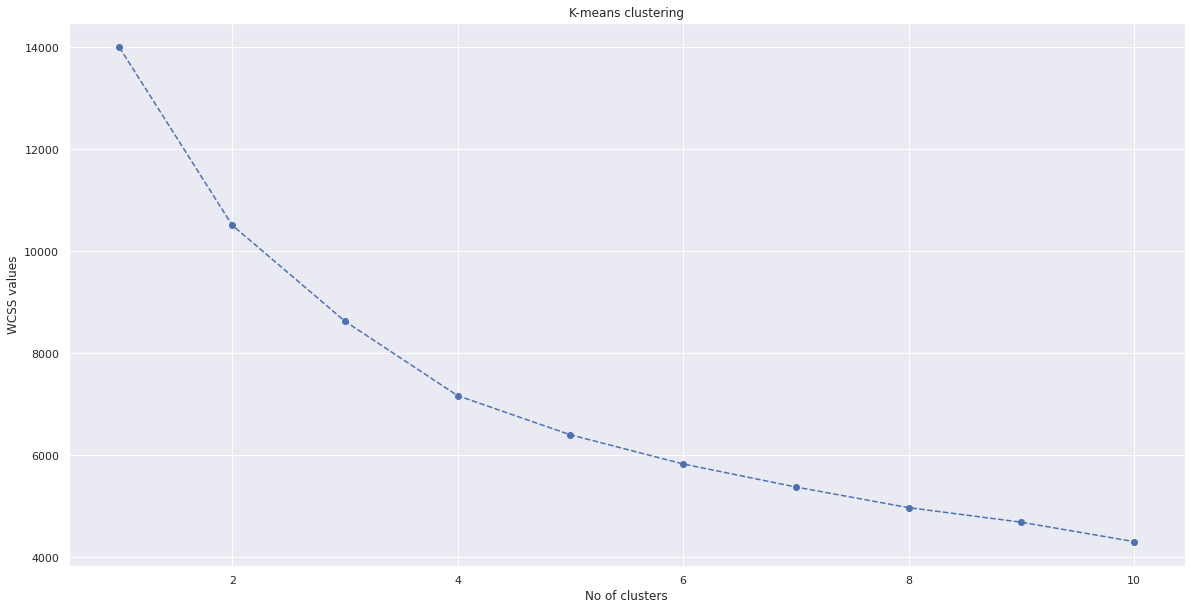

In [22]:
plt.figure(figsize = (20,10))
plt.plot(range(1,11),WCSS,marker = "o",linestyle = "--")
plt.xlabel("No of clusters")
plt.ylabel("WCSS values")
plt.title("K-means clustering")

Now we will use elbow method approach to get the best possible number of clusters.Elbow method approach is nothing but just figuring out the elbow in curve and taking it as the number of clusters.

Also below the elbow(left sided part) curve will be steeply declining and for right sided part its declination will not be that much steep.

From the above plot it is clear that elbow is at 4, so number of clusters will be 4.And we have also checked it earlier using hierarchical clustering.

Segamenting the data using 4 clusters

In [23]:
kmeans = KMeans(n_clusters = 4,init = "k-means++",random_state = 42)
kmeans.fit(standardized_df_cus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
df_cus_seg = df_cus.copy()
df_cus_seg["seg_kmeans"] = kmeans.labels_

In [25]:
df_cus_seg.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,seg_kmeans
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


seg_means column contain the cluster number to which a record belongs.

Grouping data by the clusters

In [0]:
df_cus_seg_analysis = df_cus_seg.groupby(["seg_kmeans"]).mean()

In [27]:
df_cus_seg_analysis.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
seg_kmeans,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


From the above dataframe we can see the mean feature values belonging to different clusters.

This is from where we can label our clusters on basis of feature characterstics of the cluster:

As for the zeroth labeled cluster we can see that the sex is equally distributed which means that we have half population of cluster males and half population female with an average age of 56 and almost 60% are in relationship. They are also higher in level of education and have an average income of 158338 and have occupation.

0.x% of sex means that we have (100-x)% of male in cluster

Similarly we can infer for each of our cluster their status.

And we can also come up with some of the labels corresponding to our clusters.

1)zeroth cluster-peoples who have done well(well settled and all)

2)first cluster-peoples with fewer opportunity

3)third cluster-normal or standard

4)fourth cluster-people in 30's and well focussed on their careers

In [0]:
df_cus_seg_analysis["No of observations"] = df_cus_seg[["seg_kmeans","Sex"]].groupby(["seg_kmeans"]).count()

In [0]:
df_cus_seg_analysis["proper obs percentage"] = (df_cus_seg_analysis["No of observations"]/df_cus_seg_analysis["No of observations"].sum())*100

In [30]:
df_cus_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No of observations,proper obs percentage
seg_kmeans,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,13.15
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,23.10
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,28.50
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,35.25


Applying labels to the clusters

In [31]:
df_cus_seg_analysis.rename({0:"People Well did",1:"people with fewer opportunity",2:"normal",3:"career focussed"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No of observations,proper obs percentage
seg_kmeans,,,,,,,,,
People Well did,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,13.15
people with fewer opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,23.10
normal,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,28.50
career focussed,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,35.25


Now mapping the 0,1,2,3 to the corresponding cluster names in df_cus_seg dataframe so that each of our record has a corresponding label.

In [0]:
df_cus_seg["Labels"] = df_cus_seg["seg_kmeans"].map({0:"People Well did",1:"people with fewer opportunity",2:"normal",3:"career focussed"})

In [33]:
df_cus_seg.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,seg_kmeans,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,People Well did
100000002,1,1,22,1,150773,1,2,3,career focussed
100000003,0,0,49,1,89210,0,0,1,people with fewer opportunity
100000004,0,0,45,1,171565,1,1,2,normal
100000005,0,0,53,1,149031,1,1,2,normal


Now visualizing the different clusters corresponding to the features.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


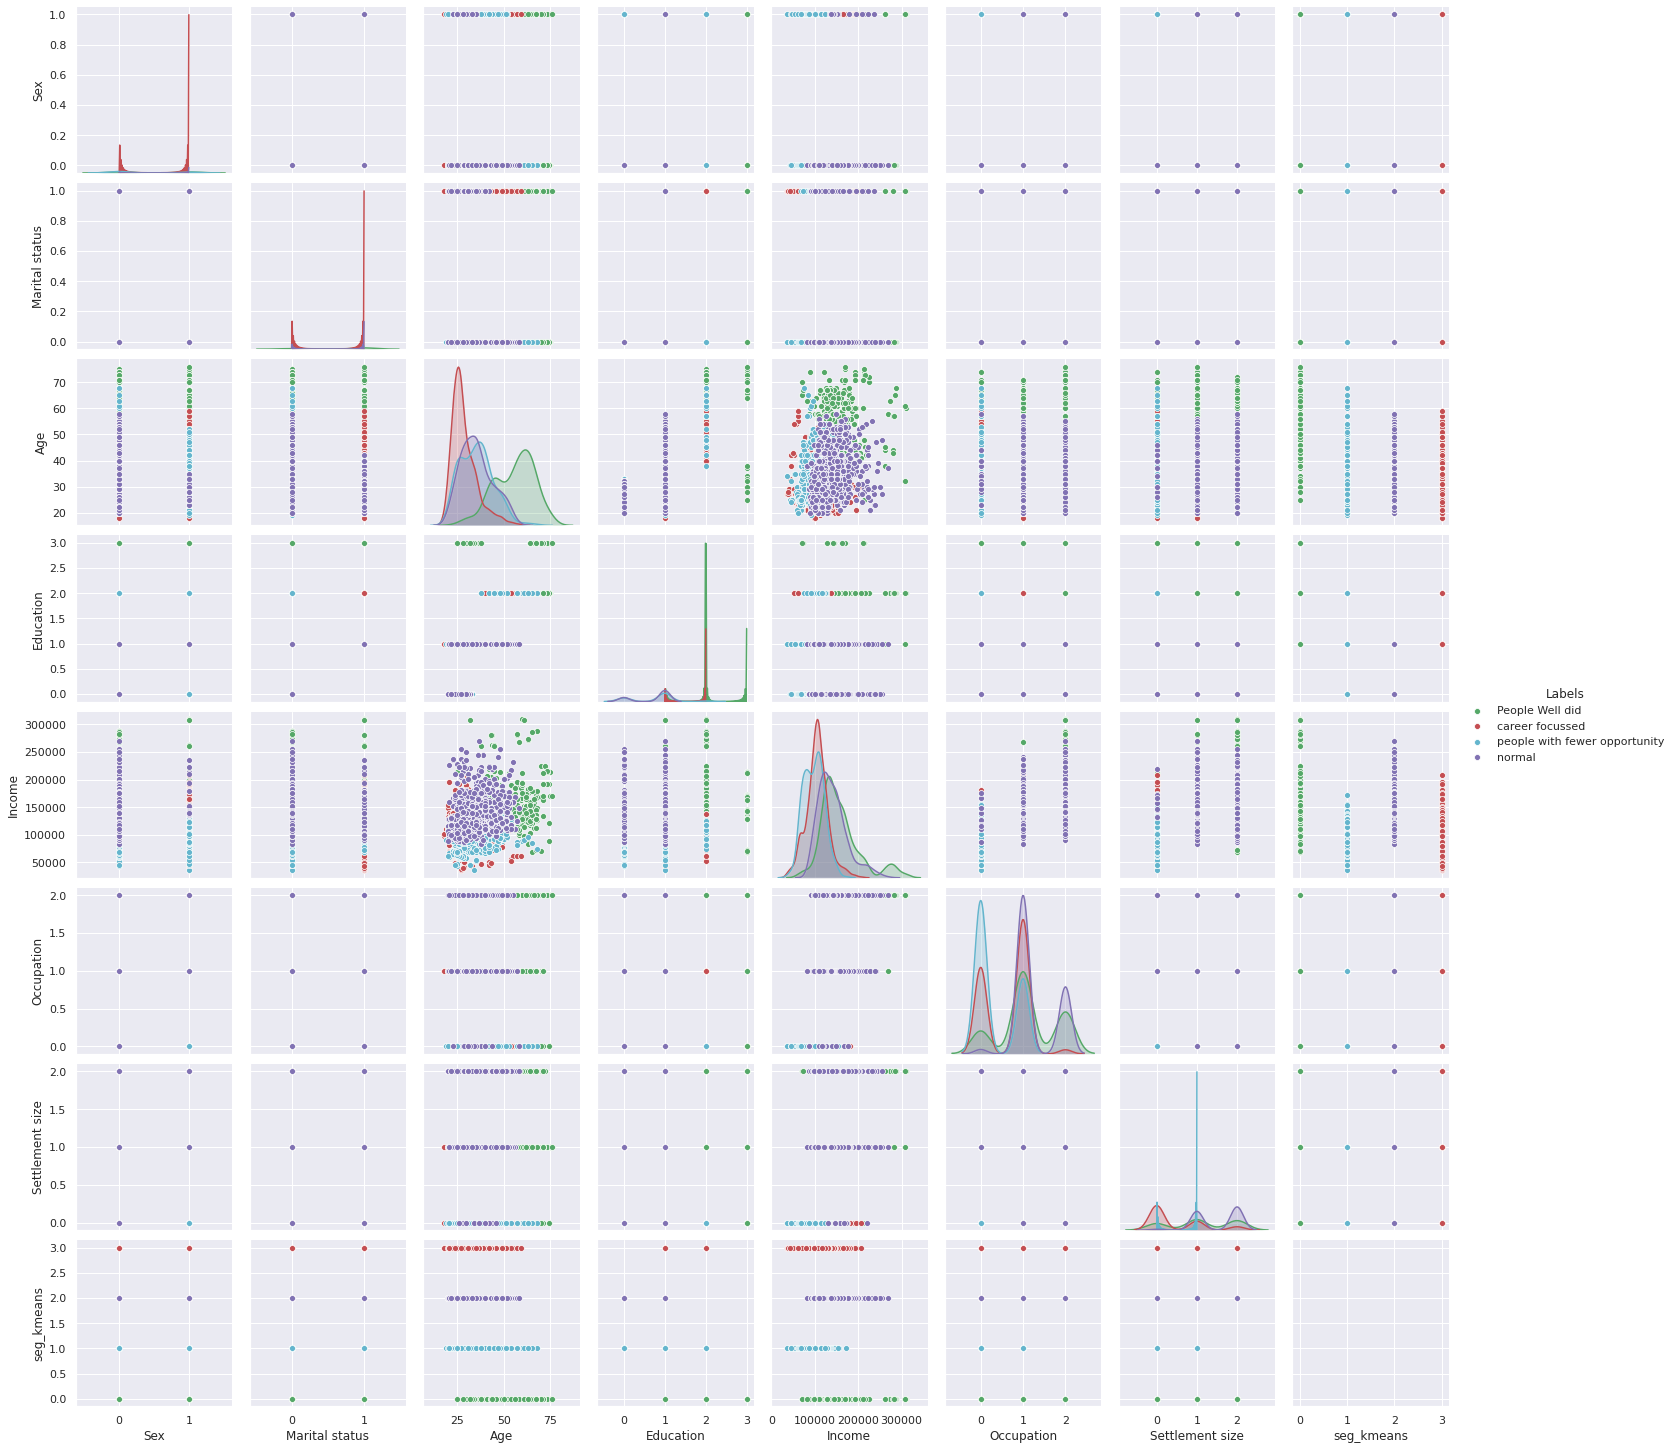

In [34]:
sns.pairplot(df_cus_seg,hue = "Labels",palette = ["g","r","c","m"])
#Combinely we can visualize all the features using pair plot but is always good to visualize features separately using joint plot or scatter plot.

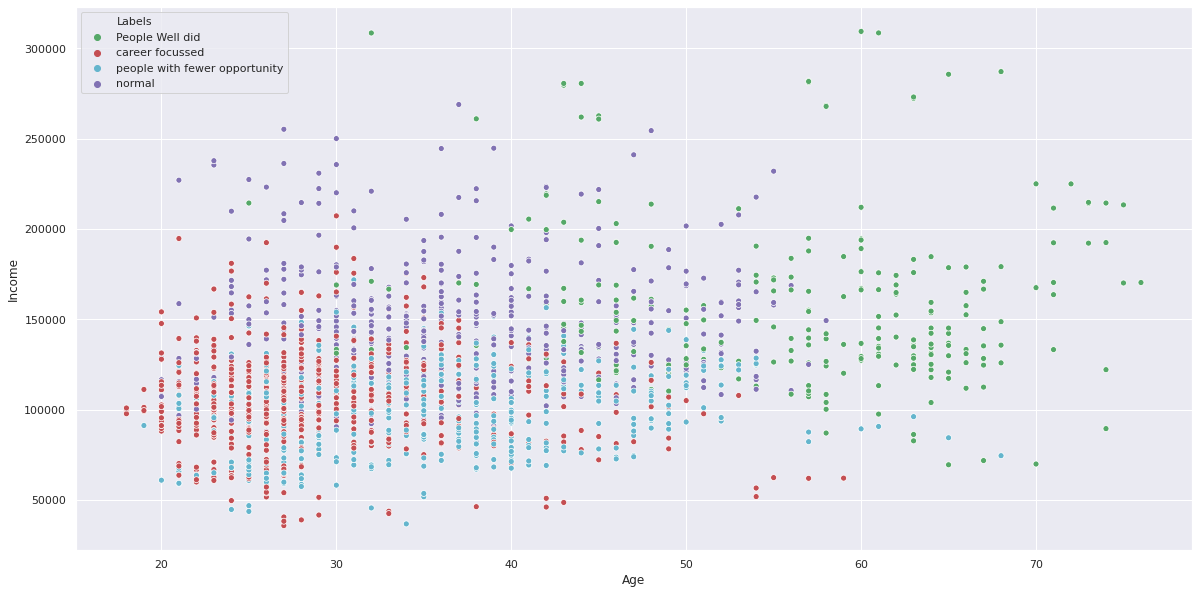

In [35]:
plt.figure(figsize = (20,10))
sns.scatterplot(df_cus_seg["Age"],df_cus_seg["Income"],hue = df_cus_seg["Labels"],palette = ["g","r","c","m"])
plt.show()

As from our plot we can see that our green points are well separated but rest of our three clusters aren't visible seperate so which menas that we by some means should make our clusters seprated for this we gonna take help of PCA reducing dimensionality. 

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(standardized_df_cus)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

From the above array we can see the variance conributed by the features of our data.It actually means that our first component explains 35% variability of our data and respectively.

Now our task is to get or find a subset of components while preserving the variance of data.

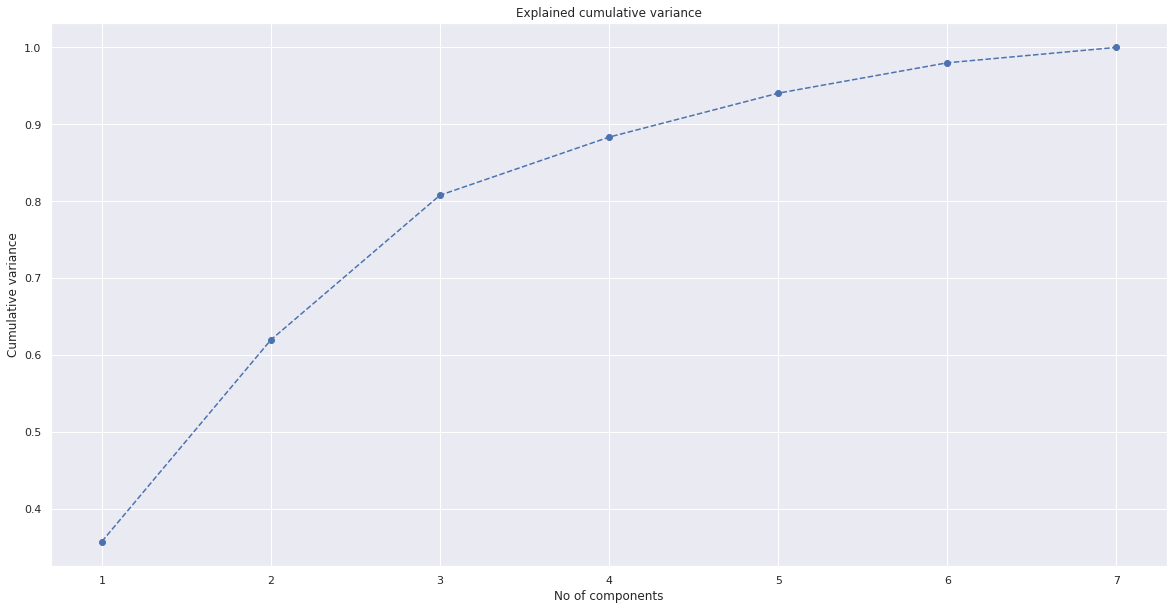

In [38]:
plt.figure(figsize = (20,10))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = "o",linestyle = "--")
plt.xlabel("No of components")
plt.ylabel("Cumulative variance")
plt.title("Explained cumulative variance")
plt.show()

One thumb rule for choosing the no of components is that we should choose as much number of component so that our 80 to 85% of variance is retained, which from the above plot is clear that we should choose no of component to be either 3 or 4.

Now applying dimension reductionality to our data.

In [39]:
pca = PCA(n_components = 3)
pca.fit(standardized_df_cus)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [41]:
#Lets create a dataframe of pca.components_ for better visualization
df_cus_pca = pd.DataFrame(data = pca.components_,columns = df_cus.columns.values,index = ["Component1","Component2","Component3"])
df_cus_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


All values are between -1 to 1 as they are correlations and they give us a interpretation that more the value close to zero less is the loading of feature onto the component.

([<matplotlib.axis.YTick at 0x7fd0ffa5d780>,
 [Text(0, 0.5, 'component1'),
  Text(0, 1.5, 'component2'),
  Text(0, 2.5, 'component3')])

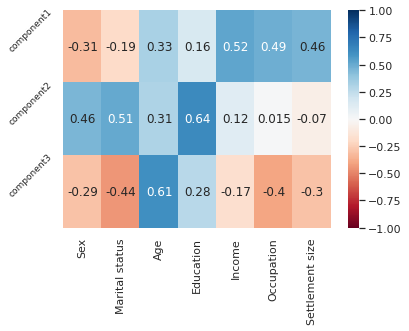

In [42]:
#Now drawing a heatmap for our correlations
sns.heatmap(df_cus_pca,vmin = -1,vmax = 1,cmap = "RdBu",annot = True)
plt.yticks([0,1,2],["component1","component2","component3"],rotation = 45,fontsize = 9)

From the correlations we can see that our component 1 shows the career focus of person,second component shows the person's education and life style and third the experience.

Negative loading also plays prominent role.

Now transforming our data to three dimensions from seven using pca.

In [0]:
df_pcatra_cus = pca.transform(standardized_df_cus)

In [44]:
df_pcatra_cus

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

Now as we have seen earlier that our clusters are not well separated when we were using Kmeans so now we will try to use Kmeans with pca and will see our clusters.

In [0]:
WCSS = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
  kmeans_pca.fit(df_pcatra_cus)
  WCSS.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-means with pca clustering')

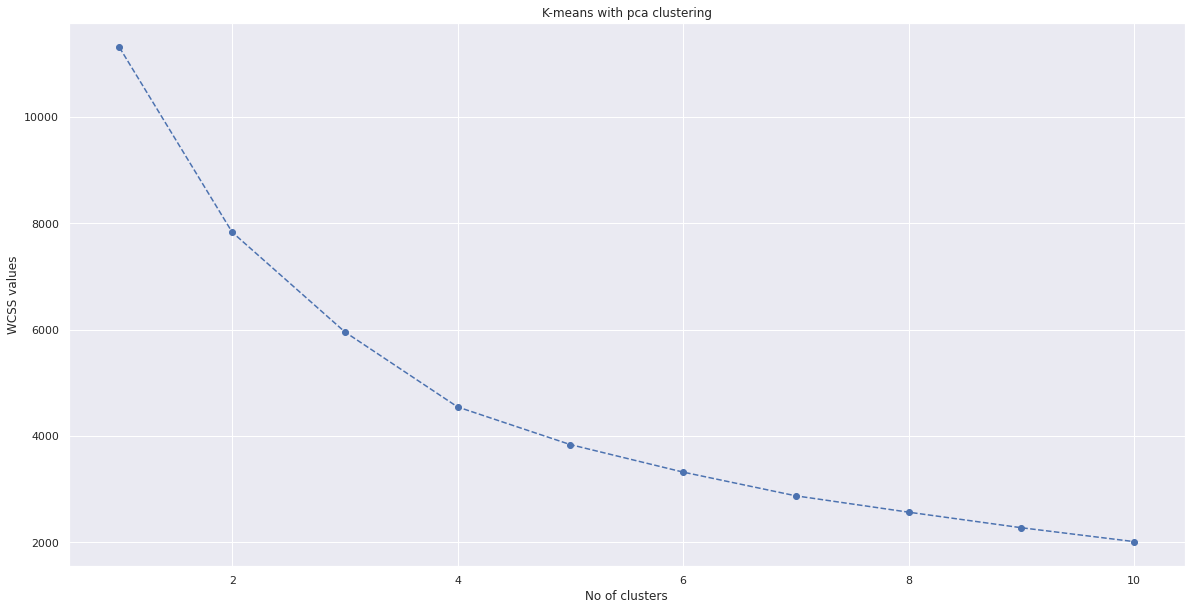

In [46]:
plt.figure(figsize = (20,10))
plt.plot(range(1,11),WCSS,marker = "o",linestyle = "--")
plt.xlabel("No of clusters")
plt.ylabel("WCSS values")
plt.title("K-means with pca clustering")

Now as we again that our elbow method generalizes to 4 clusters so we will be moving forward with 4 clusters.

In [47]:
kmeans_pca = KMeans(n_clusters = 4,init = "k-means++",random_state = 42)
kmeans_pca.fit(df_pcatra_cus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
df_pca_kmeans_cus = pd.concat([df_cus.reset_index(drop = True),pd.DataFrame(df_pcatra_cus)],axis = 1)
#Now setting the column names for the components in dataframe
df_pca_kmeans_cus.columns.values[-3:] = ["component1","component2","component3"]
df_pca_kmeans_cus["pca kmeans segaments"] = kmeans.labels_

In [49]:
df_pca_kmeans_cus.head(5)
#Now this the dataframe where we are having the original columns and their decomposed columns as pca components and the corresponding cluster column(pca kmeans segaments)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3,pca kmeans segaments
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2


In [50]:
df_pca_kmeans_cus_freq = df_pca_kmeans_cus.groupby(["pca kmeans segaments"]).mean()
df_pca_kmeans_cus_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3
pca kmeans segaments,,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,1.705835,2.031437,0.836957
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,-0.923797,-0.931458,0.983810
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.389408,-1.046391,-0.276923
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,-1.154330,0.698594,-0.733040


Now using this dataframe ansd info from df_cus_seg_analysis we can define the clusters and labels and focus on peoples in our cluster accordingly

In [0]:
df_pca_kmeans_cus_freq["No of observations"] = df_pca_kmeans_cus[["pca kmeans segaments","Sex"]].groupby(["pca kmeans segaments"]).count()

In [0]:
df_pca_kmeans_cus_freq["proper obs percentage"] = (df_pca_kmeans_cus_freq["No of observations"]/df_pca_kmeans_cus_freq["No of observations"].sum())*100

In [0]:
df_pca_kmeans_cus_freq = df_pca_kmeans_cus_freq.rename({0:"People Well did",1:"people with fewer opportunity",2:"normal",3:"career focussed"})

In [54]:
df_pca_kmeans_cus_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3,No of observations,proper obs percentage
pca kmeans segaments,,,,,,,,,,,,
People Well did,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,1.705835,2.031437,0.836957,263,13.15
people with fewer opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,-0.923797,-0.931458,0.983810,462,23.10
normal,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.389408,-1.046391,-0.276923,570,28.50
career focussed,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,-1.154330,0.698594,-0.733040,705,35.25


From this dataframe we can get a lot of intuition about our customers and can focus on them accordingly.

Now visualizing the segaments with respect to the components we got from pca.

In [0]:
df_pca_kmeans_cus["Labels"] = df_pca_kmeans_cus["pca kmeans segaments"].map({0:"People Well did",1:"people with fewer opportunity",2:"normal",3:"career focussed"})

In [56]:
df_pca_kmeans_cus.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3,pca kmeans segaments,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0,People Well did
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3,career focussed
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,people with fewer opportunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2,normal
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2,normal


Now visualizing our data in clusters.

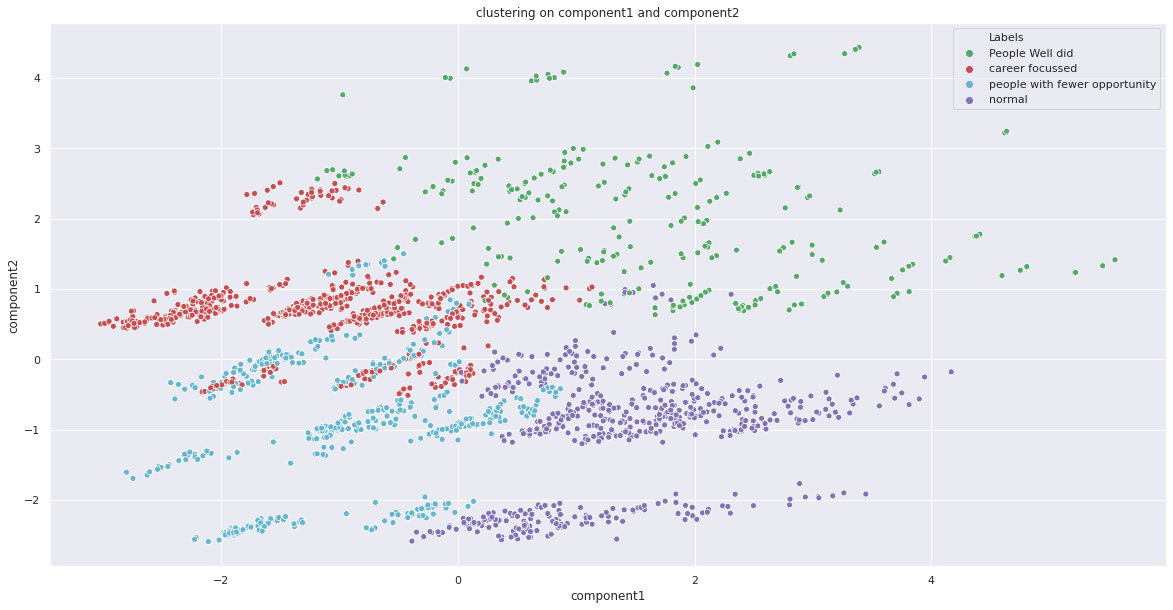

In [57]:
plt.figure(figsize = (20,10))
sns.scatterplot(df_pca_kmeans_cus["component1"],df_pca_kmeans_cus["component2"],hue = df_pca_kmeans_cus["Labels"],palette = ["g","r","c","m"])
plt.title("clustering on component1 and component2")
plt.show()

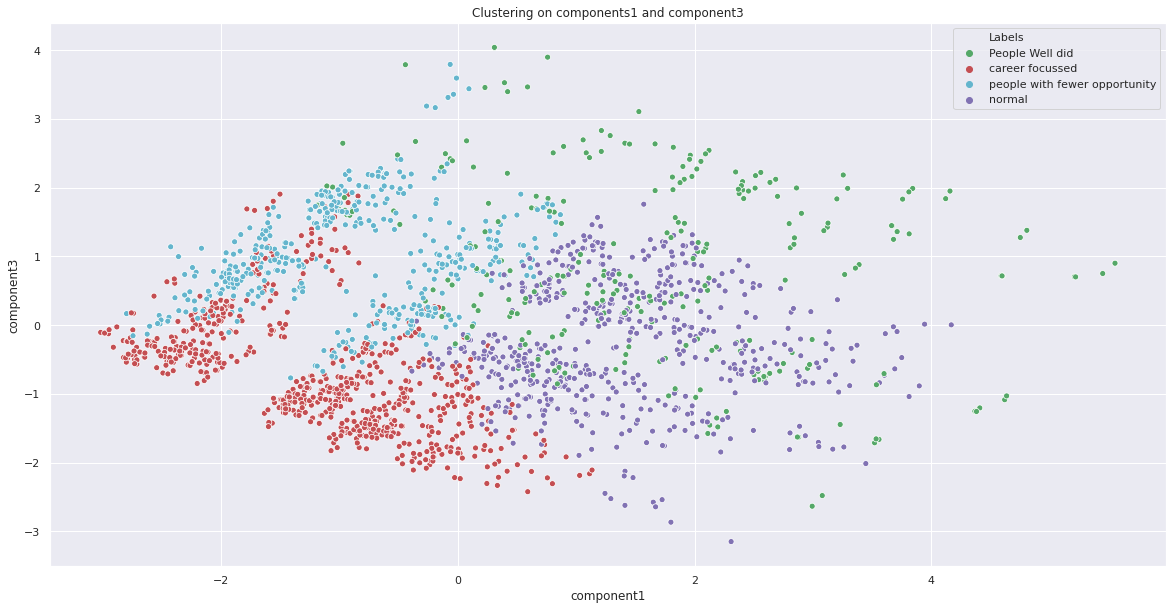

In [58]:
plt.figure(figsize = (20,10))
sns.scatterplot(df_pca_kmeans_cus["component1"],df_pca_kmeans_cus["component3"],hue = df_pca_kmeans_cus["Labels"],palette = ["g","r","c","m"])
plt.title("Clustering on components1 and component3")
plt.show()

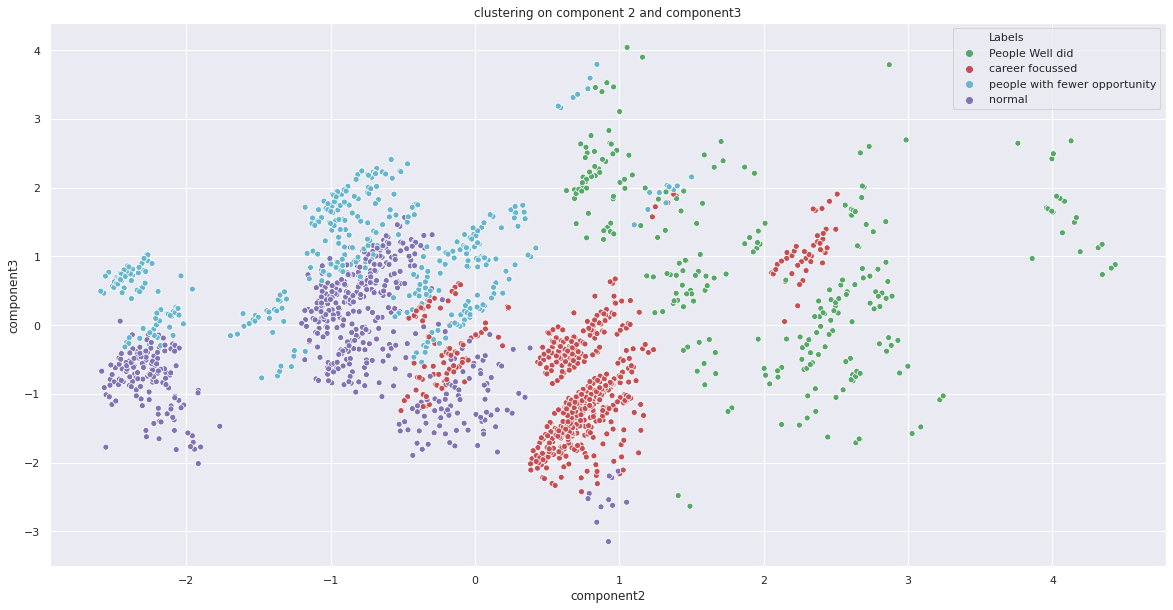

In [59]:
plt.figure(figsize = (20,10))
sns.scatterplot(df_pca_kmeans_cus["component2"],df_pca_kmeans_cus["component3"],hue = df_pca_kmeans_cus["Labels"],palette = ["g","r","c","m"])
plt.title("clustering on component 2 and component3")
plt.show()

Now as we can see that our plots are preety good as compared to one we got earlier as each of our segaments looks preety separated.And the plot on component 1 and plot 2 is much good as our segaments are much out of each other.

Division based on component is preety much pronounced.

Saving the preprocessing files

In [0]:
import pickle
pickle.dump(sc,open("scaler.pickle","wb"))
pickle.dump(pca,open("pca.pickle","wb"))
pickle.dump(kmeans_pca,open("kmeans_pca","wb"))